In [2]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import h5py
from pylab import rcParams
import pandas as pd
import os
from tqdm import tqdm
rcParams['figure.figsize'] = 20,9

In [3]:
f = h5py.File('data/ND-Single-Electron/neardet_genie_N1810j0211a_nonswap_genierw_fhc_v08_2000_r00013281_s05_c000_R19-11-18-prod5reco.z_v1_20200613_061839_sim_single_electron.h5caf.h5', 'r')

cvnmaps=pd.DataFrame(f['rec.training.cvnmaps']['cvnmap'])
cosmic=pd.DataFrame()
for i in f['rec.mc.cosmic'].keys():
    cosmic[i]=pd.DataFrame(f['rec.mc.cosmic'][i])

cosmic['euclidean'] = (((cosmic['vtx.x'] - cosmic['stop.x']) ** 2) +
                         (cosmic['vtx.y'] - cosmic['stop.y']) ** 2 +
                         (cosmic['vtx.z'] - cosmic['stop.z']) ** 2) ** .5
df=pd.concat([cosmic, cvnmaps],axis=1)

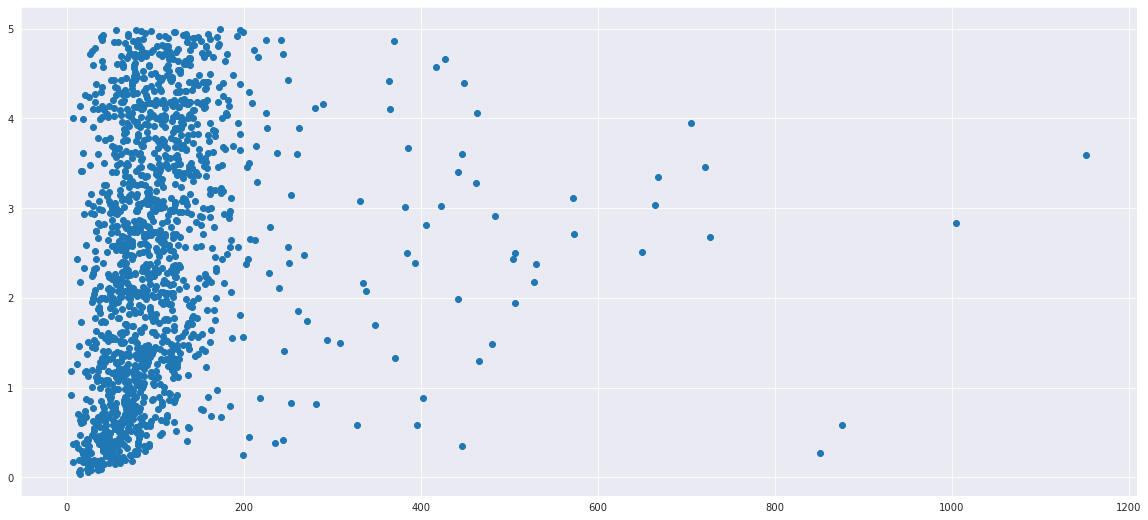

In [4]:
plt.scatter(y=cosmic['p.E'],x=cosmic['euclidean'])
plt.show()

In [7]:
df=df[(df['vtx.x'] > -180) & (df['vtx.x'] < 180) & (df['vtx.y'] > -180) & (df['vtx.y'] < 180) & (
            df['vtx.z'] > 50) & (df['vtx.z'] < 1200) & (df['stop.x'] > -180) & (df['stop.x'] < 180) & (
                   df['stop.y'] > -180) & (df['stop.y'] < 180) & (df['stop.z'] > 30) & (df['stop.z'] < 700)]

In [8]:
df

,E,azimuth,cycle,eff,enter.x,enter.y,enter.z,evt,exit.x,exit.y,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,0.617841,0.456482,0.0,1.000000,31.066917,139.217041,250.074768,1.0,84.294640,133.165161,...,0,0,0,0,0,0,0,0,0,0
3,0.986585,-2.106991,0.0,1.000000,97.396156,168.943924,504.751770,4.0,89.043945,109.589500,...,0,0,0,0,0,0,0,0,0,0
5,3.966161,-2.342307,0.0,0.997607,-50.094177,-47.891380,345.583862,7.0,-114.489754,27.091892,...,0,0,0,0,0,0,0,0,0,0
7,2.378484,-1.185850,0.0,0.846840,-170.079941,95.626495,251.658371,9.0,-151.608414,172.802216,...,0,0,0,0,0,0,0,0,0,0
12,4.073792,-2.775755,0.0,1.000000,-34.033226,58.977390,157.085922,14.0,-91.847466,130.217728,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,0.321875,2.253673,0.0,0.994245,-71.650360,18.850803,395.417877,1987.0,-80.486557,16.062962,...,0,0,0,0,0,0,0,0,0,0
1489,4.384305,2.932541,0.0,1.000000,95.509384,-101.287888,67.277748,1988.0,68.252884,-119.133812,...,0,0,0,0,0,0,0,0,0,0
1490,4.848912,-0.888102,0.0,1.000000,-48.152496,52.823853,580.878723,1989.0,-20.436230,84.037292,...,0,0,0,0,0,0,0,0,0,0
1494,4.376113,0.520888,0.0,1.000000,-61.099911,90.248993,510.230682,1993.0,40.647831,11.250977,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(len(df)):
    pm=df.iloc[i,38:16038].values
    pm=pm.reshape((2,100,80))
    pm=np.concatenate((pm[0].reshape((100,80)),pm[1].reshape((100,80))),axis = 1)
    #pm = np.stack((pm,)*3, axis=-1)
    #max=np.max(pm)
    #pm= pm /max
    plt.imshow(pm.astype(float))
    plt.colorbar()
    plt.savefig('./plots/electrones/'
         +str(i)+'-'
         +str(df.iloc[i]['nhitslc'])+'-'
         +str(df.iloc[i]['p.E'])+'-'
         +str(df.iloc[i]['euclidean'])+'.jpg')
    plt.clf()
    os.system ("clear")

/tmp/ipykernel_8819/1410937552.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
